In [1]:
R.version

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          0.0                         
year           2020                        
month          04                          
day            24                          
svn rev        78286                       
language       R                           
version.string R version 4.0.0 (2020-04-24)
nickname       Arbor Day                   

**********

**********
### Some arbitrary identities

We verify computationally the identities

$\mathrm{Cov} (a X + b, c Y + d) = ac \mathrm{Cov}(X, Y)$ and

$\mathrm{Var}(X + Y) = \mathrm{X} + \mathrm{Y} + 2 \mathrm{Cov}(X,Y)$

for random variables $X, Y$.

In [2]:
#Array to randomly select coefficients a, b, c, d
numbers <- 1:200

In [11]:
#Verify equalities for X ~ unif, Y ~ exp
equal1 <- c()
equal1_var <- c()

for(i in 1:1000){
    x1 <- runif(1000)

    y1 <- rexp(1000, .5)
    
    a <- sample(numbers, 1)

    b <- sample(numbers, 1)

    c <- sample(numbers, 1)

    d <- sample(numbers, 1)
    
    equal1 <- c(equal1, round(cov(a*x1 + b, c*y1 + d), 4) == round(a*c*cov(x1,y1), 4))
    
    equal1_var <- c(equal1_var, round(var(x1+y1), 4) == round(var(x1) + var(y1) + 2*cov(x1, y1), 4))
}

In [12]:
table(equal1)

equal1
TRUE 
1000 

In [14]:
table(equal1_var)

equal1_var
TRUE 
1000 

In [18]:
#Verify equalities for X ~ norm, Y ~ exp

equal2 <- c()

equal2_var <- c()

for(i in 1:1000){
    x2 <- rnorm(1000)

    y2 <- rexp(1000, .5)

    a <- sample(numbers, 1)

    b <- sample(numbers, 1)

    c <- sample(numbers, 1)

    d <- sample(numbers, 1)
    
    equal2 <- c(equal2, round(cov(a*x2 + b, c*y2 + d), 4) == round(a*c*cov(x2,y2), 4))
    
    equal2_var <- c(equal2_var, round(var(x2+y2), 4) == round(var(x2) + var(y2) + 2*cov(x2, y2), 4))

}

In [19]:
table(equal2)

equal2
TRUE 
1000 

In [20]:
table(equal2_var)

equal2_var
TRUE 
1000 

In [21]:
equal3 <- c()

equal3_var <- c()

for(i in 1:1000){
    x3 <- rgeom(1000, .33)

    y3 <- rpois(1000, 1)
    
    a <- sample(numbers, 1)

    b <- sample(numbers, 1)

    c <- sample(numbers, 1)

    d <- sample(numbers, 1)
    
    equal3 <- c(equal3, round(cov(a*x3 + b, c*y3 + d), 4) == round(a*c*cov(x3,y3), 4))
    
    equal3_var <- c(equal3_var, round(var(x3+y3), 4) == round(var(x3) + var(y3) + 2*cov(x3, y3), 4))

    
}


In [22]:
table(equal3)

equal3
TRUE 
1000 

In [24]:
table(equal3_var)

equal3_var
TRUE 
1000 

******************

**********

### Goodness of fit

We obtain road network data for the state of Pennsylvania, from https://snap.stanford.edu/data/roadNet-PA.html

Degree sequence is obtained in Python and exported to a csv file (see ```network_processing.ipynb```)

We perform a *goodness of fit Chi Squared test* to see if the network has a Poisson degree distribution, which is what would be expected for a random model.

In [14]:
df <- read.csv("degree_sequence.csv")

In [15]:
deg_seq <- df$deg

In [42]:
mean(deg_seq)

[1] 2.834132

In [16]:
length(deg_seq)

[1] 1088092

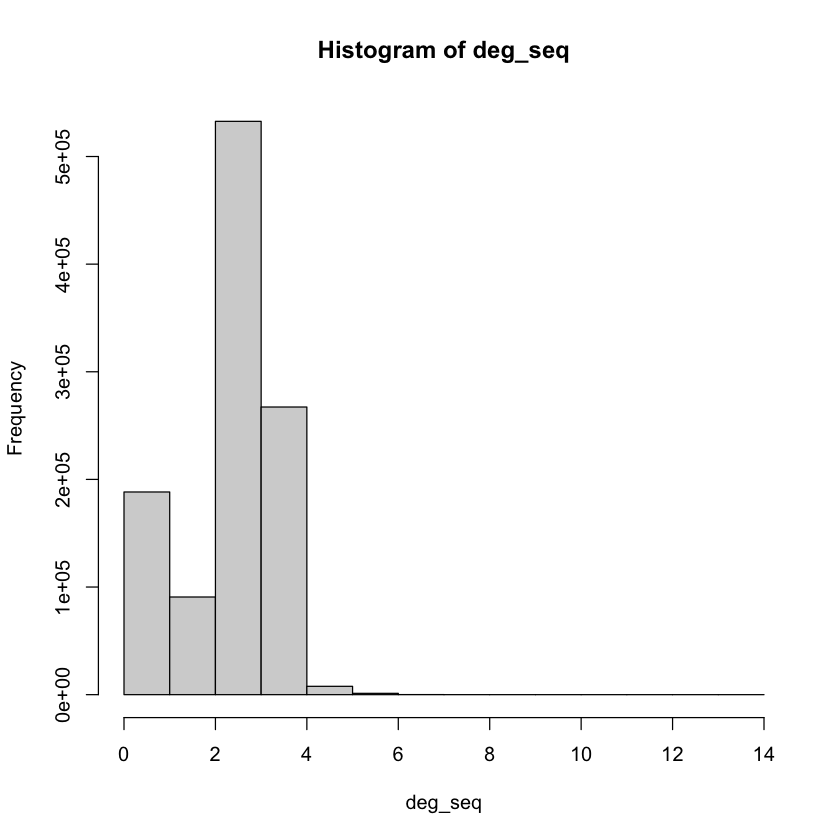

In [17]:
hist_degseq <- hist(deg_seq, breaks = 0:14)

In [18]:
L <- length(deg_seq)

In [19]:
set.seed(1)

In [20]:
pois <- rpois(L, mean(deg_seq))

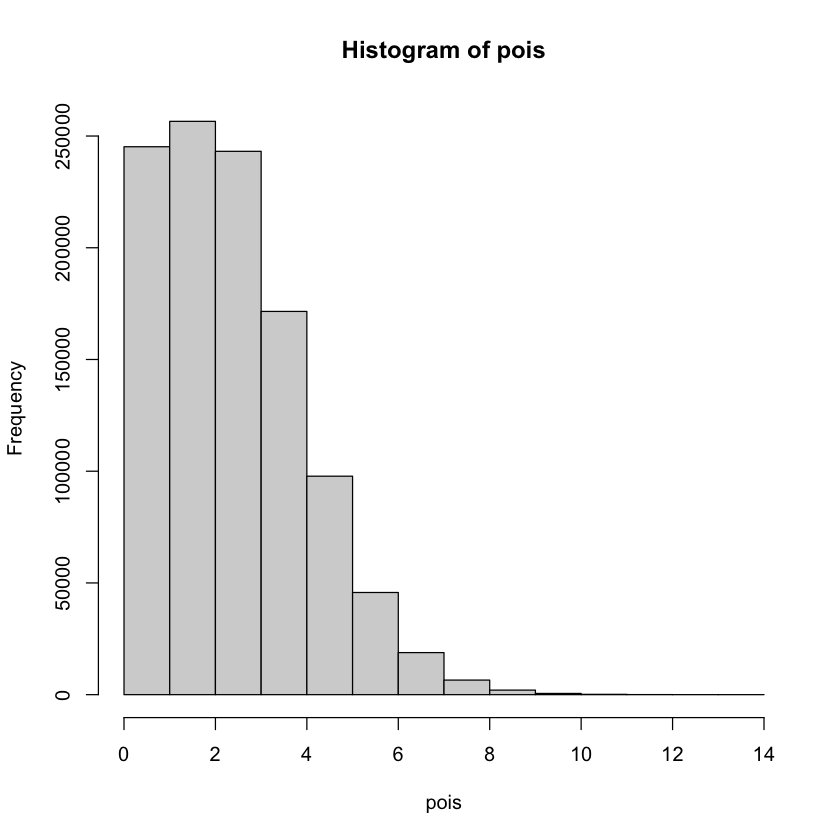

In [21]:
hist_pois <- hist(pois, breaks=0:14)

In [22]:
expected <- hist_pois$counts

In [23]:
observed <- hist_degseq$counts

In [32]:
expected

[1] 245208 256577 243159 171512  97772  45727  18825   6526   2039    550
[11]    147     41      7      2

In [33]:
observed

[1] 188317  90740 532686 267256   7759   1237     80     13      4      0
[11]      0      0      0      0

In [43]:
library(xtable)

Warning message:
“package ‘xtable’ was built under R version 4.0.2”


In [45]:
print(xtable(data.frame(expected = expected, observed = observed)))

% latex table generated in R 4.0.0 by xtable 1.8-4 package
% Thu Nov 12 19:57:31 2020
\begin{table}[ht]
\centering
\begin{tabular}{rrr}
  \hline
 & expected & observed \\ 
  \hline
1 & 245208 & 188317 \\ 
  2 & 256577 & 90740 \\ 
  3 & 243159 & 532686 \\ 
  4 & 171512 & 267256 \\ 
  5 & 97772 & 7759 \\ 
  6 & 45727 & 1237 \\ 
  7 & 18825 &  80 \\ 
  8 & 6526 &  13 \\ 
  9 & 2039 &   4 \\ 
  10 & 550 &   0 \\ 
  11 & 147 &   0 \\ 
  12 &  41 &   0 \\ 
  13 &   7 &   0 \\ 
  14 &   2 &   0 \\ 
   \hline
\end{tabular}
\end{table}


In [24]:
chisq <- ((observed - expected)**2 / expected)

In [25]:
chisq <- sum(chisq)

In [26]:
chisq

[1] 672671.2

In [27]:
length(expected)

[1] 14

In [28]:
p <- 1-pchisq(chisq, 13)

In [29]:
p

[1] 0

Since $p < 0.05$ we conclude the network degree distribution is not random

*******
*********
### Ehrenfest's urn

In [3]:
ek <- function(k, n){
    x <- rep(0, k-1)
    x <- c(x, 1, rep(0, n-k))
    return(x)
}

In [4]:
add <- function(x,y){
    return( (x+y)%%2 )
}

In [1]:
n <- 50

state <- rep(0, n)

urn_B <- c(sum(state))

urn_A <- c(n-sum(state))

steps <- 1000

In [5]:
for (i in 1:steps){
    
    #print(state)
    
    state <- add(state, ek(sample(1:n, 1), n))  
    
    urn_B <- c(urn_B, sum(state))
    
    urn_A <- c(urn_A, n - sum(state))
}

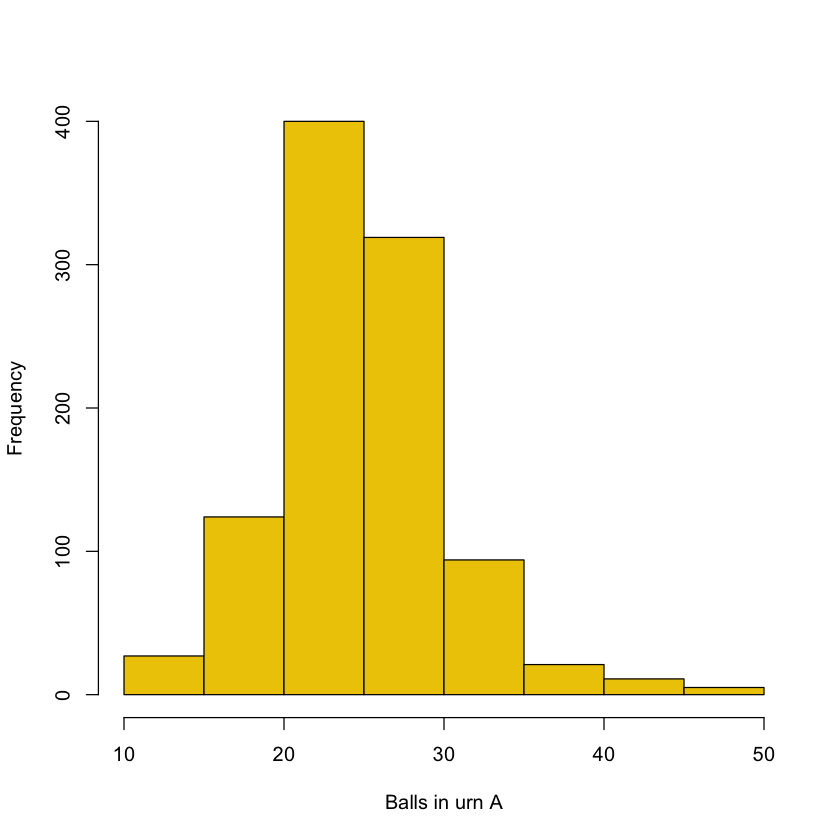

In [35]:
hist(urn_A, col="gold2", main="", xlab="Balls in urn A")

In [37]:
png(filename="hist_urnA.png", height=2000, width=2000, res=400)
hist(urn_A, col="gold2", main="", xlab="Balls in urn A")
dev.off()

pdf 
  2

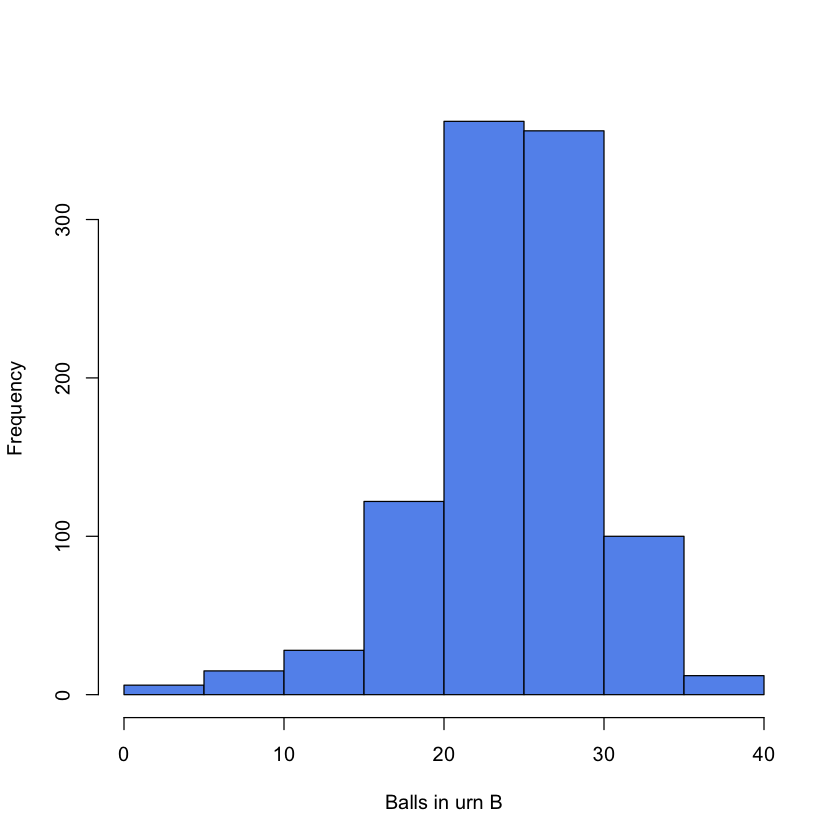

In [13]:
hist(urn_B, col="cornflowerblue", main="", xlab="Balls in urn B")

In [38]:
png(filename="hist_urnB.png", height=2000, width=2000, res=400)
hist(urn_B, col="cornflowerblue", main="", xlab="Balls in urn B")
dev.off()

pdf 
  2

In [46]:
mean(urn_A)

[1] 25.25075

In [47]:
mean(urn_B)

[1] 24.74925

n <- 6

state <- rep(0, n)

urn_B <- c(sum(state))

urn_A <- c(n-sum(state))

steps <- 20

name <- paste("image", 0, ".png", sep="")
png(filename=name, height=2000, width=2000, res=400)
barplot(c(n - sum(state), sum(state)), 
    names.arg = c("Urn A", "Urn B"),
    col=c("gold2", "cornflowerblue"),
    main = paste("Ball distribution at time ", 0),
    ylab="Balls",
    ylim=c(0, n))
dev.off()

for (i in 1:steps){
    
    #print(state)
    
    state <- add(state, ek(sample(1:n, 1), n))  
    
    urn_B <- c(urn_B, sum(state))
    
    urn_A <- c(urn_A, n - sum(state))
    
    name <- paste("image", i, ".png", sep="")
    png(filename=name, height=2000, width=2000, res=400)
    barplot(c(n - sum(state), sum(state)), 
        names.arg = c("Urn A", "Urn B"),
        col=c("gold2", "cornflowerblue"),
        main = paste("Ball distribution at time ", i),
        ylab="Balls",
        ylim=c(0, n))
    dev.off()
}

#print(state)